# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [2]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

import numpy as np
import matplotlib.pyplot as plt

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
train_data = pd.read_csv("train.csv")

In [4]:
train_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
train_data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
#Description
train_data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [7]:
# Observation
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


- We find some missing data in reviews_per_month columns

We can see the non-numeric attributes (type is "object") are:
- region
- accommodation_type


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [8]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


#### Exploratory data analysis

In [9]:
train_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


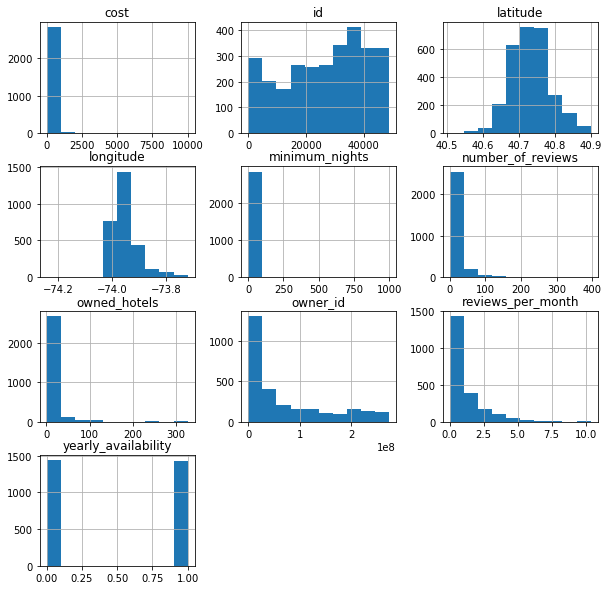

In [10]:
train_data.hist(figsize=(10,10))
plt.show()

partition the data

In [11]:
# try to find some relationship between cost and yearly_availability
train_data.groupby('yearly_availability').agg(['mean','count'])['cost']

,mean,count
yearly_availability,,
0,136.177206,1439
1,256.043326,1431


- Find that hotels have higher mean of the cost are more likely to score yearly_availability the hotels have lower mean of the cost

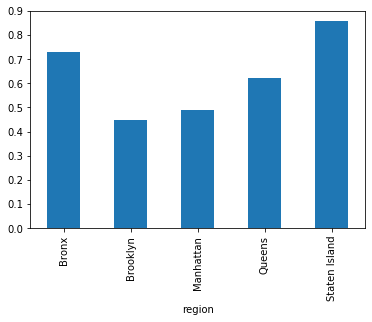

In [12]:
# try to find some relationship between region and yearly_availability
data_gbregion = train_data.groupby('region').agg(['mean','count'])['yearly_availability']
data_gbregion['mean'].plot.bar()

In [13]:
data_gbregion

,mean,count
region,,
Bronx,0.730769,78
Brooklyn,0.447442,1075
Manhattan,0.488372,1333
Queens,0.621622,370
Staten Island,0.857143,14


#### Prepare the data

In [14]:
# Since we know there is no missing value in yearly_availability, we can seperate target from features first
y_train = train_data['yearly_availability']
train_data.drop(columns=['yearly_availability'], inplace = True)

In [15]:
# drop the irrelavent columns: id, owner_id
train_data.drop(columns=['id', 'owner_id'], inplace = True)

##### cleaning

In [16]:
# we find missing values in column reviews_per_month
# Use the median value to fill missing values

In [17]:
median_reviews_per_month = train_data['reviews_per_month'].median()
train_data['reviews_per_month'].fillna(value = median_reviews_per_month,inplace=True)

In [18]:
train_data.head()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels
0,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,1
1,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,1
2,Queens,40.78573,-73.81062,Private room,85,1,0,0.65,1
3,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.65,65
4,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,3


##### Adding features

In [19]:
# 1. minimum cost (cost* minimum_nights)
train_data['minimum_cost'] = train_data['cost']*train_data['minimum_nights']

In [20]:
train_data.head()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,minimum_cost
0,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,1,850
1,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,1,195
2,Queens,40.78573,-73.81062,Private room,85,1,0,0.65,1,85
3,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.65,65,6300
4,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,3,225


In [22]:
# Find that there are lot without reviews
len(train_data[train_data['number_of_reviews']==0])/len(train_data)

0.23554006968641114

In [23]:
# 2. have number_of_reviews or not
train_data['have_reviews'] = train_data['number_of_reviews']

In [24]:
train_data.loc[(train_data.have_reviews > 0),'have_reviews'] = int(1)

##### Handling non-numeric features

In [26]:
cat_features = ['region','accommodation_type']
for col in cat_features:
    encoded_columns = pd.get_dummies(train_data[col])
    train_data = train_data.join(encoded_columns).drop(col, axis=1)

In [27]:
# Take a look at the data again 
train_data.head()

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,minimum_cost,have_reviews,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.71854,-74.00439,170,5,7,0.56,1,850,1,0,0,1,0,0,1,0,0
1,40.64446,-73.95030,65,3,238,2.30,1,195,1,0,1,0,0,0,1,0,0
2,40.78573,-73.81062,85,1,0,0.65,1,85,0,0,0,0,1,0,0,1,0
3,40.73863,-73.98002,210,30,0,0.65,65,6300,0,0,0,1,0,0,0,1,0
4,40.82426,-73.94630,75,3,38,0.42,3,225,1,0,0,1,0,0,0,0,1


In [28]:
train_data.shape

(2870, 17)

#### Train a model & Model selection

In [29]:
from sklearn import linear_model, preprocessing, model_selection 
logistic_clf = linear_model.LogisticRegression(solver='liblinear')

In [30]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto")

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

for name, clf in { "Logistic": logistic_clf,
                   "SVM": svm_clf,
                   "Random Forest": forest_clf
                 }.items():
    
    # Combine the transformation pipeline with a classification step
    model_pipeline = Pipeline(steps=[("classify", clf)])
    
    # Cross validation on the combined pipeline
    scores = cross_val_score(model_pipeline, train_data, y_train, cv=10)
    print("Model: {m:s} avg cross val score={s:3.2f}\n".format(m=name, s=scores.mean()) )
       
    # Fit the model using all training data.
    _= model_pipeline.fit(train_data, y_train)

Model: Logistic avg cross val score=0.86

Model: SVM avg cross val score=0.60

Model: Random Forest avg cross val score=0.93



In [33]:
# Since Random Forest model has highest score on cross validation 
# we select Random Forest model to conduct prediction later
cross_val_score(forest_clf, train_data, y_train, cv=10).mean()

0.9306679347075688

In [34]:
_ = forest_clf.fit(train_data, y_train)

#### Transform the test set

In [35]:
# Following the same steps as we transform the train_data to deal with the test_data
test_data_id = test_data['id']
test_data.drop(columns=['id', 'owner_id'], inplace = True)
median_reviews_per_month = test_data['reviews_per_month'].median()
test_data['reviews_per_month'].fillna(value = median_reviews_per_month,inplace=True)

test_data['minimum_cost'] = test_data['cost']*test_data['minimum_nights']
test_data['have_reviews'] = test_data['number_of_reviews']
test_data.loc[(test_data.have_reviews > 0),'have_reviews'] = int(1)

cat_features = ['region','accommodation_type']
for col in cat_features:
    encoded_columns = pd.get_dummies(test_data[col])
    test_data = test_data.join(encoded_columns).drop(col, axis=1)

In [36]:
# Take a look at the test_data and make sure the shape of test data and training data match
test_data.head()

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,minimum_cost,have_reviews,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.70912,-73.94513,135,2,22,0.66,1,270,1,0,1,0,0,0,0,0,1
1,40.57646,-73.96641,69,2,8,0.90,2,138,1,0,1,0,0,0,1,0,0
2,40.76616,-73.98228,225,30,0,0.67,12,6750,0,0,0,1,0,0,0,1,0
3,40.77668,-73.94587,125,30,9,0.82,1,3750,1,0,0,1,0,0,0,0,1
4,40.80279,-73.94450,43,1,13,0.72,2,43,1,0,0,1,0,0,1,0,0


In [37]:
print('The shape of test data is:', test_data.shape)
print('The shape of train data is:', train_data.shape)

The shape of test data is: (718, 17)
The shape of train data is: (2870, 17)


#### Predict using the model selected

In [38]:
result = forest_clf.predict(test_data)



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [39]:
forest_clf.feature_importances_

array([4.13660097e-02, 5.02566666e-02, 4.03224050e-02, 4.28473846e-02,
       5.75862364e-02, 6.02025880e-02, 1.40174767e-01, 5.27097867e-02,
       1.12536134e-02, 3.74532791e-03, 3.89198139e-03, 4.71144423e-03,
       3.92832089e-03, 9.46772327e-05, 1.75633905e-01, 2.48599853e-01,
       6.26750319e-02])

Text(0.5, 0, 'Feature Importance')

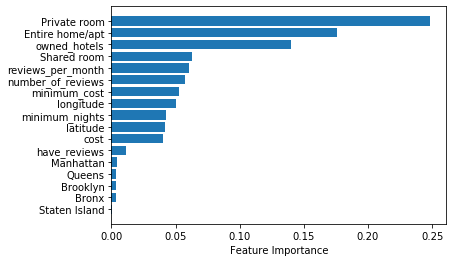

In [40]:
sort = forest_clf.feature_importances_.argsort()
plt.barh(train_data.columns[sort], forest_clf.feature_importances_[sort])
plt.xlabel("Feature Importance")

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [41]:
submission_df = pd.DataFrame()

In [42]:
submission_df['id'] = test_data_id
submission_df['yearly_availability'] = result
submission_df.head()

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0


In [44]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---